In [1]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

In [24]:
def System(r, t):
    x,y,z,vx,vy,vz = r
    
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = 1.*vy*np.sin(0.3*t)
    dvydt = -1.*vx*np.sin(0.3*t)
    dvzdt = 0
    
    return [dxdt,dydt,dzdt,dvxdt,dvydt,dvzdt] 

In [26]:
def RungeKutta_Second(f,r0,t):
    
    h = t[1] - t[0]
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    z = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    vz = np.zeros_like(t)
    
    
    x[0] = r0[0]
    y[0] = r0[1]
    z[0] = r0[2]
    vx[0] = r0[3]
    vy[0] = r0[4]
    vz[0] = r0[5]
    
    K1 = np.zeros(6)
    K2 = np.zeros(6)
    
    # Las pendientes instantaneas
    R = np.zeros(6)

    for i in range(1,len(t)):
        
        R = np.array([x[i-1],y[i-1],z[i-1],vx[i-1],vy[i-1],vz[i-1]])
        
        K1 = f(R,t[i-1])
        
        R = np.array([x[i-1]+h*K1[0],y[i-1]+h*K1[1],z[i-1]+h*K1[2],vx[i-1]+h*K1[3],vy[i-1]+h*K1[4],vz[i-1]+h*K1[5]])
        
        K2 = f(R,t[i-1]+h)
        
        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0])
        y[i] = y[i-1] + 0.5*h*(K1[1]+K2[1])
        z[i] = z[i-1] + 0.5*h*(K1[2]+K2[2])
        
        vx[i] = vx[i-1] + 0.5*h*(K1[3]+K2[3])
        vy[i] = vy[i-1] + 0.5*h*(K1[4]+K2[4])
        vz[i] = vz[i-1] + 0.5*h*(K1[5]+K2[5])
        
    return x,y,z,vx,vy,vz

<IPython.core.display.Javascript object>


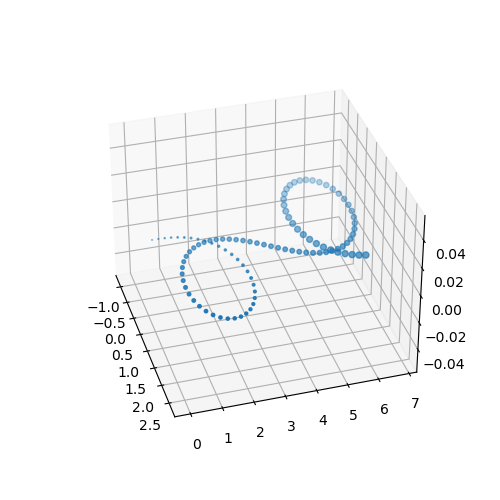

In [27]:
h = 0.01
t = np.linspace(0,20,100)
r0 = [0.,0.,0.,0.,1.,1.]
x,y,z,vx,vy,vz = RungeKutta_Second(System, r0, t)
figure = plt.figure(figsize = (5,5))
ax = figure.add_subplot(projection = "3d")
plt.scatter(x, y, z)